![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://i.ytimg.com/vi/r4SbfFZGfIY/mqdefault.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Project
## Page View Time Series Visualizer
For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.


In [14]:
#Import the lirbaries and import the data set
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('fcc-forum-pageviews.csv')


In [15]:
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace = True)
df.info

<bound method DataFrame.info of              value
date              
2016-05-09    1201
2016-05-10    2329
2016-05-11    1716
2016-05-12   10539
2016-05-13    6933
...            ...
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-02  220144
2019-12-03  158549

[1304 rows x 1 columns]>

In [16]:
# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) & 
(df['value'] <= df['value'].quantile(0.975))]

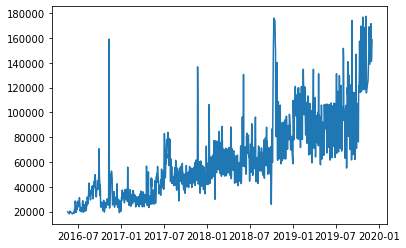

In [17]:
plt.plot(df.index, df['value'])
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(10,5))
    plt.plot(df.index, df['value'])
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.xlabel("Date")
    plt.ylabel("Page Views")
    
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

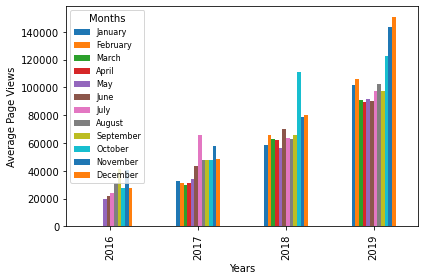

In [22]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

 # Draw bar plot
# Month names for plotting legend
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig = df_bar.plot.bar()
fig.legend(months, title='Months', prop={'size': 8})
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.tight_layout()
fig = fig.figure

# Save image and return fig (don't change this part)
fig.savefig('bar_plot.png')
return fig